In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import random

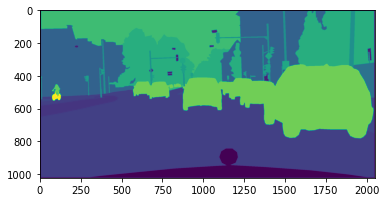

In [30]:
img = np.asarray(Image.open("bremen_000116_000019_gtFine_labelIds.png"))
img.dtype = 'uint8'
plt.imshow(img)

In [4]:
def check_column(img, r_index, c_index):
    count = 0
    i = 0
    while(img[r_index, c_index + i] == 19):
         i += 1
         count += 1
    i = 0
    while(img[r_index, c_index - i] == 19):
         i += 1
         count += 1
    return (c_index - i) + int(count/2) 

In [5]:
def check_row(img, r_index, c_index):
    count = 0
    i = 0
    while(img[r_index + i, c_index] == 19):
         i += 1
         count += 1
    i = 0
    while(img[r_index - i, c_index] == 19):
         i += 1
         count += 1
         
    return (r_index - i) + int(count/2)

In [6]:
# gets the corner of the wanted to crop picture.
def crop(img, coordinates):
    return img[coordinates[0]: coordinates[0]+81, coordinates[1]: coordinates[1] + 81]
    

In [7]:
def no_tfl_area(idx, idx2):
    for i in range(idx, idx + 81):
        for j in range(idx2, idx2 + 81):
            if img[i][j] == 19:
                return False
    return True

In [40]:
def get_non_tfl(img):
    a = random.randint(0, len(img) - 81)
    b = random.randint(0, len(img[0]) - 81)
    
    # starts search for 81X81 square without tfl from random index.
    for idx in range(a, len(img) - 81):
        for idx2 in range(b, len(img[0]) - 81):
            if no_tfl_area(idx, idx2) == True:
                return idx, idx2
     
    # if no good square:
    # starts search from right corner - checking what wasnt checked.
    for row in range(a):
        for col in range(b):
            if no_tfl_area(row, col) == True:
                return row, col
            
    # if still no good square:
    # search rest of picture:
    for row in range(a):
        for row in range(b, len(img[0]) - 81):
            if no_tfl_area(row, col) == True:
                return row, col
    
    # did not find a square with no tfl:
    return np.eye(81)

In [58]:
# this function makes sure that tfl is not always
# in the center - so we can train the machine well.
# it takes the center and moves it away randomly.
def get_corner_index(row, column, img):
    row = row - random.randint(0, 81)
    column = column - random.randint(0, 81)
    return [min(max(0, row), len(img) - 81), min(max(0, column), len(img[0]) - 81)]

In [59]:
def get_tfl_sample(img):
    for i in range(len(img)):
        for j in range(len(img[0])):
           if img[i, j] == 19:
                row = check_row(img, i, j)
                column = check_column(img, i, j)
                return get_corner_index(row, column, img)
                #return [max(0, row-40),max(0, column - 40) ]
    return None

In [68]:
def where(img, row, column):
    new_img = img.copy()
    new_img[row: row+81, column: column+81] = 255
    return new_img

In [61]:
get = get_tfl_sample(img)

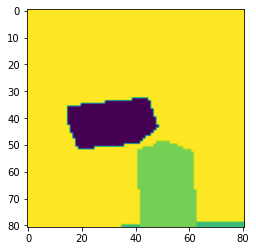

In [62]:
plt.imshow(crop(img, get))

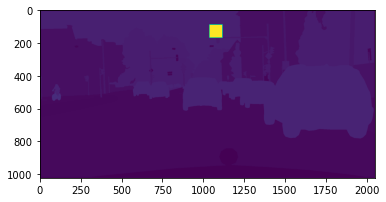

In [63]:
plt.imshow(where(img, get[0], get[1]))

In [64]:
import glob

In [65]:
def dataset_init():
    non_tfls = []
    tfls = []
    original_imgs = []
    data = [0, 0 , 0]
    path = '../../all_scaleup_imgs/scaleup_imgs/*'
    lables = '_gtFine_labelIds.png'
    original = '_leftImg8bit.png'
    for filename in glob.glob(path + lables):
        im =  np.asarray(Image.open(filename))
        original_img =  np.asarray(Image.open(filename[:-20] + original))
        tfl_coordinates = get_tfl_sample(im)
        if tfl_coordinates:
            croped = crop(original_img, tfl_coordinates)
            tfls.append(croped)
            non_tfl_coordinates = get_non_tfl(im)
            croped = crop(original_img, non_tfl_coordinates)
            non_tfls.append(croped)
            original_imgs.append(data)
    return tfls, non_tfls

In [66]:
tfls, non_tfls = dataset_init()
print(len(tfls), len(non_tfls))

42 42


<ipython-input-67-17b0ef7a50c4>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


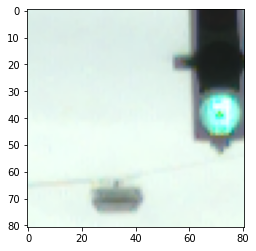

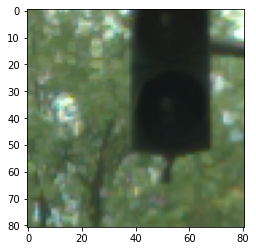

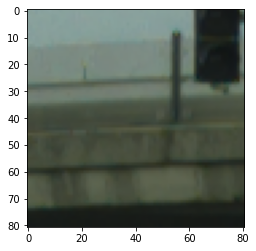

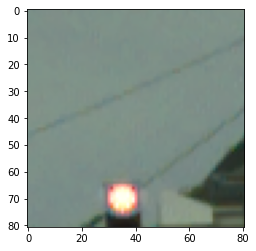

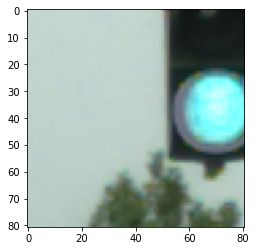

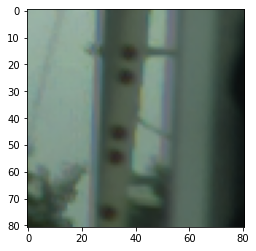

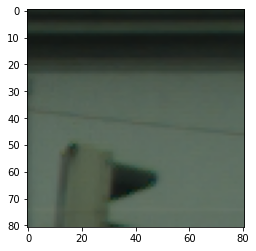

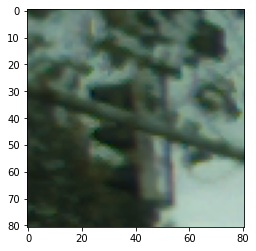

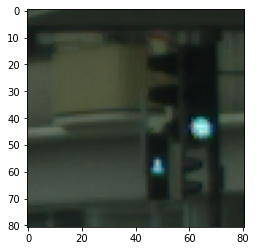

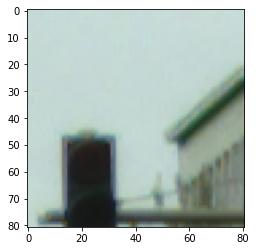

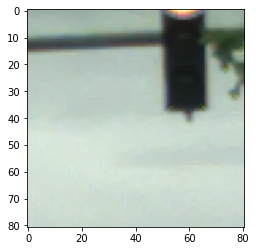

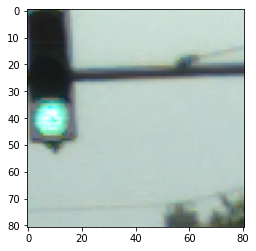

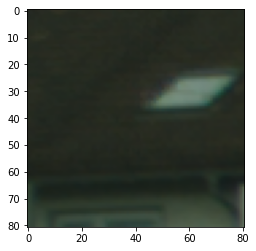

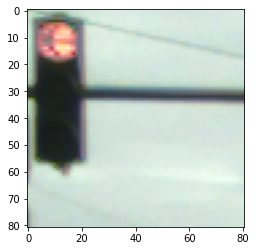

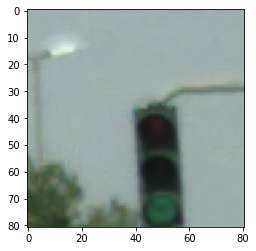

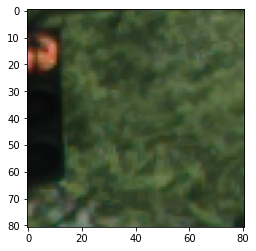

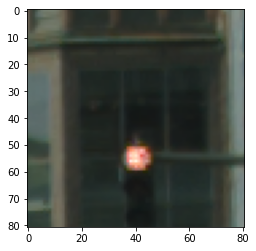

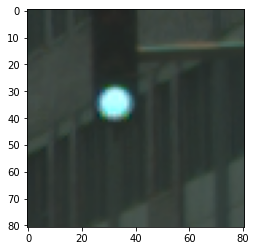

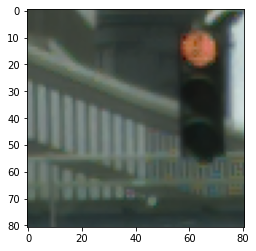

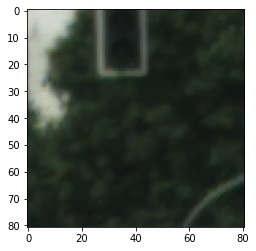

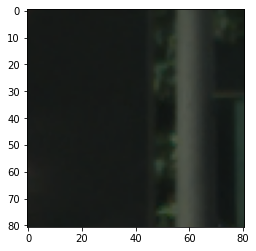

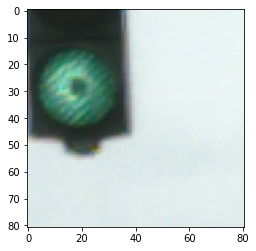

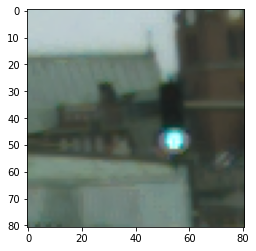

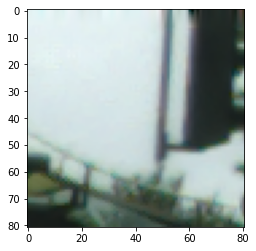

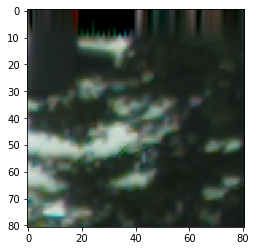

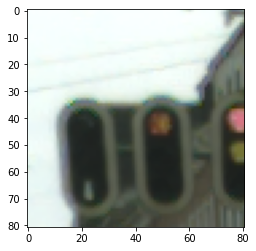

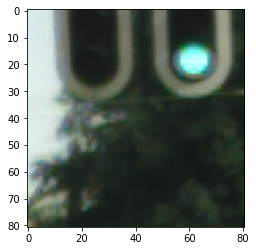

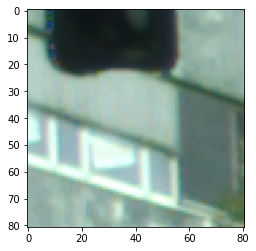

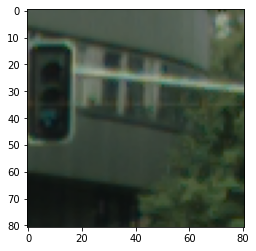

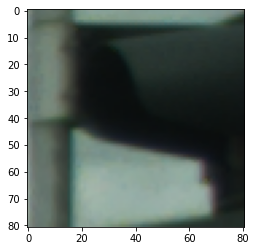

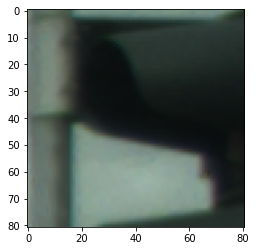

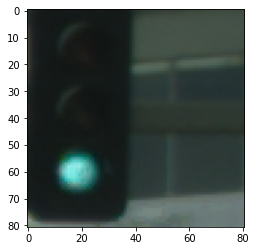

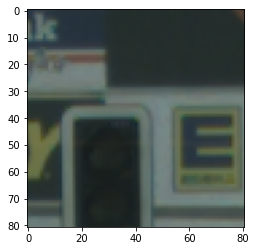

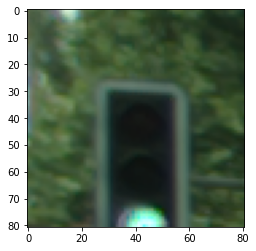

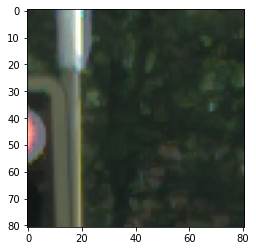

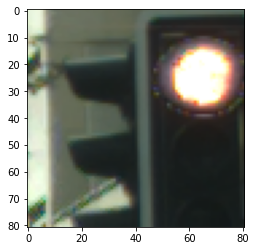

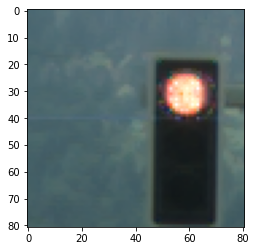

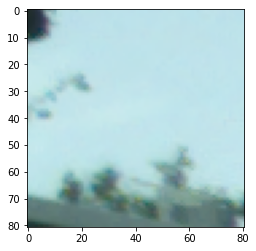

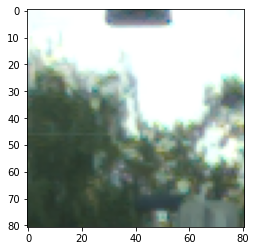

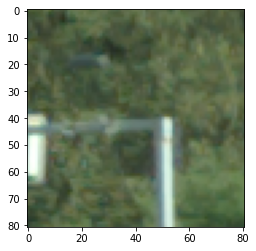

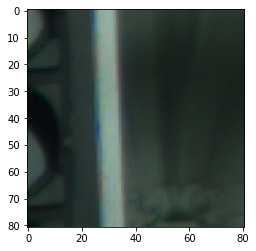

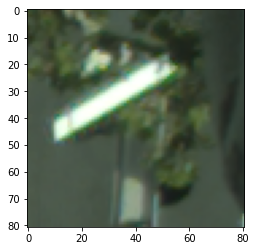

In [67]:
for im in tfls:
    plt.figure()
    plt.imshow(im)

<ipython-input-52-65359668719c>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


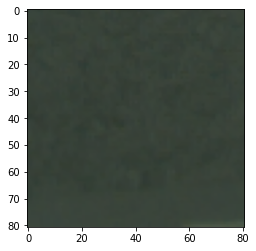

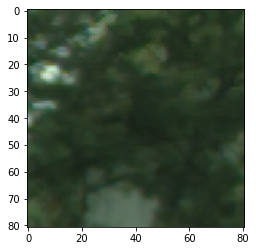

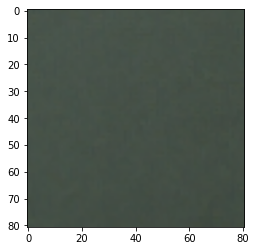

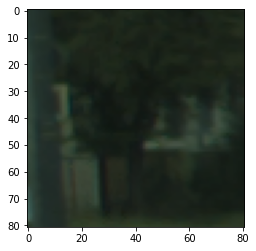

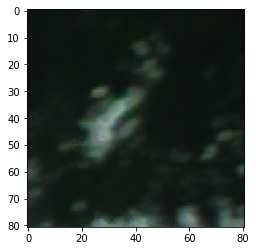

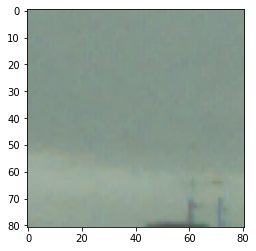

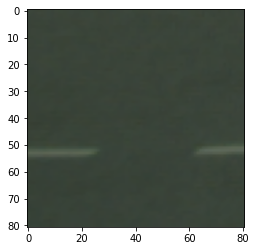

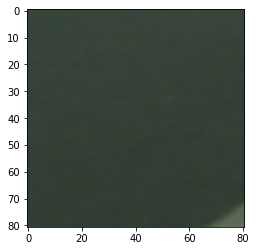

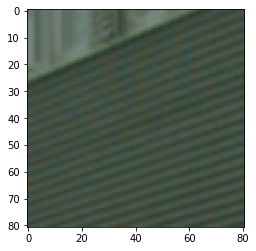

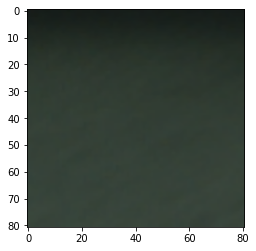

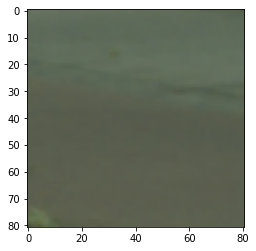

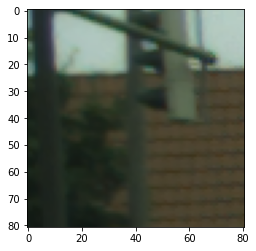

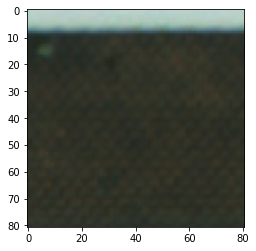

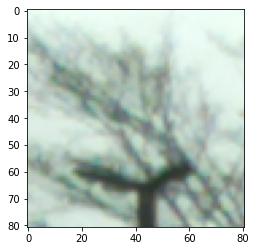

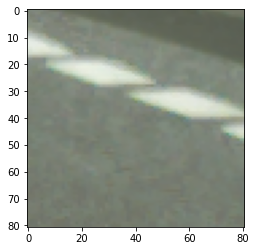

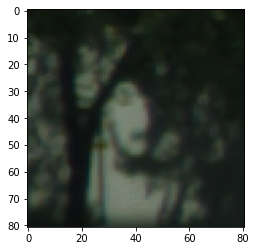

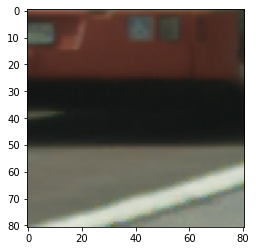

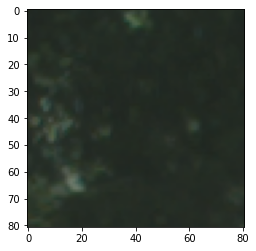

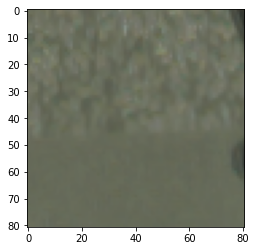

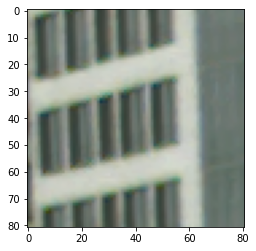

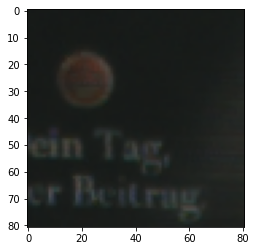

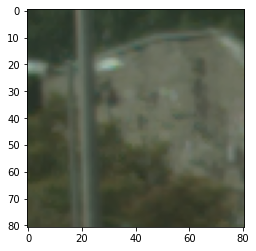

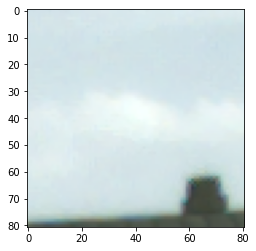

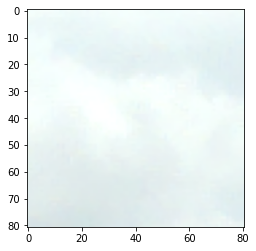

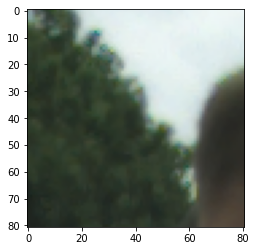

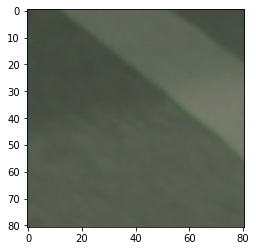

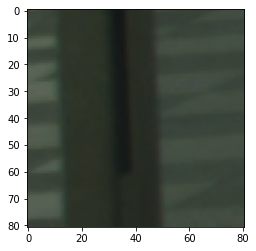

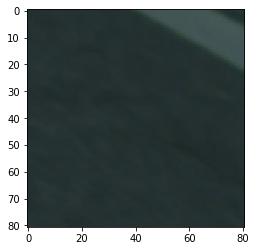

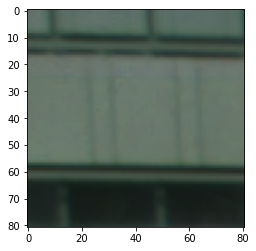

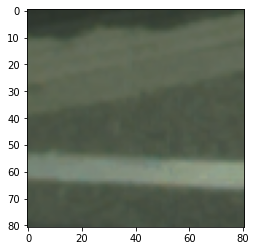

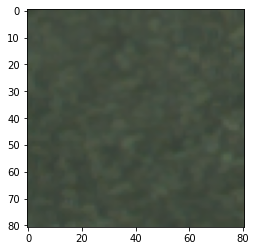

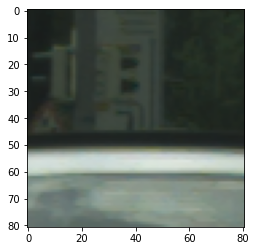

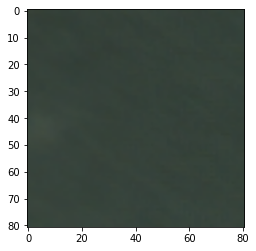

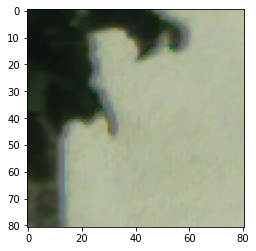

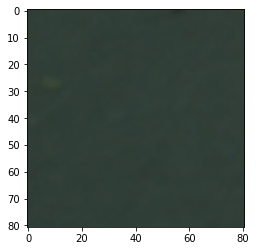

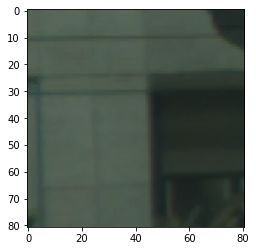

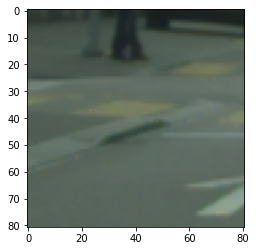

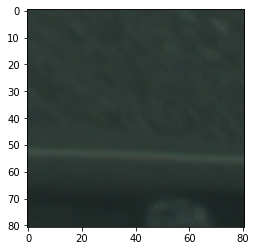

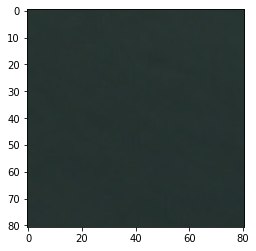

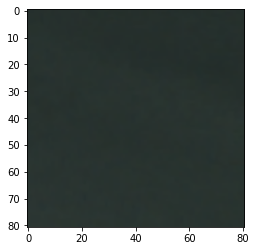

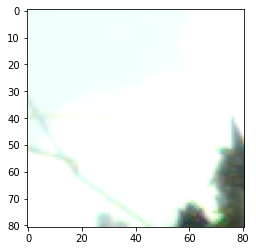

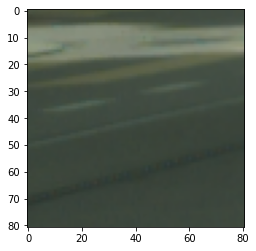

In [52]:
for im in non_tfls:
    plt.figure()
    plt.imshow(im)